<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/6.%20%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B8_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Линейная и логистическая регрессия**

## **Линейная регрессия**


###  **Задание №1. Прогнозирование продаж автомобилей**:


   - **Шаг 1**: Загрузите набор данных о продажах автомобилей, содержащий информацию о цене, возрасте, пробеге и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте `pandas` для обнаружения пропусков (`df.isnull().sum()`) и выбросов (например, с помощью метода межквартильного размаха - `df.boxplot()`).
     - **Совет**: Для пропущенных значений используйте стратегию заполнения средними значениями или медианой, чтобы минимизировать влияние на распределение данных (`df.fillna()`).

- Ссылка на набор данных: https://www.kaggle.com/datasets/gagandeep16/car-sales

In [2]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Car_sales.csv', sep=',')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
missing_values

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

<Axes: >

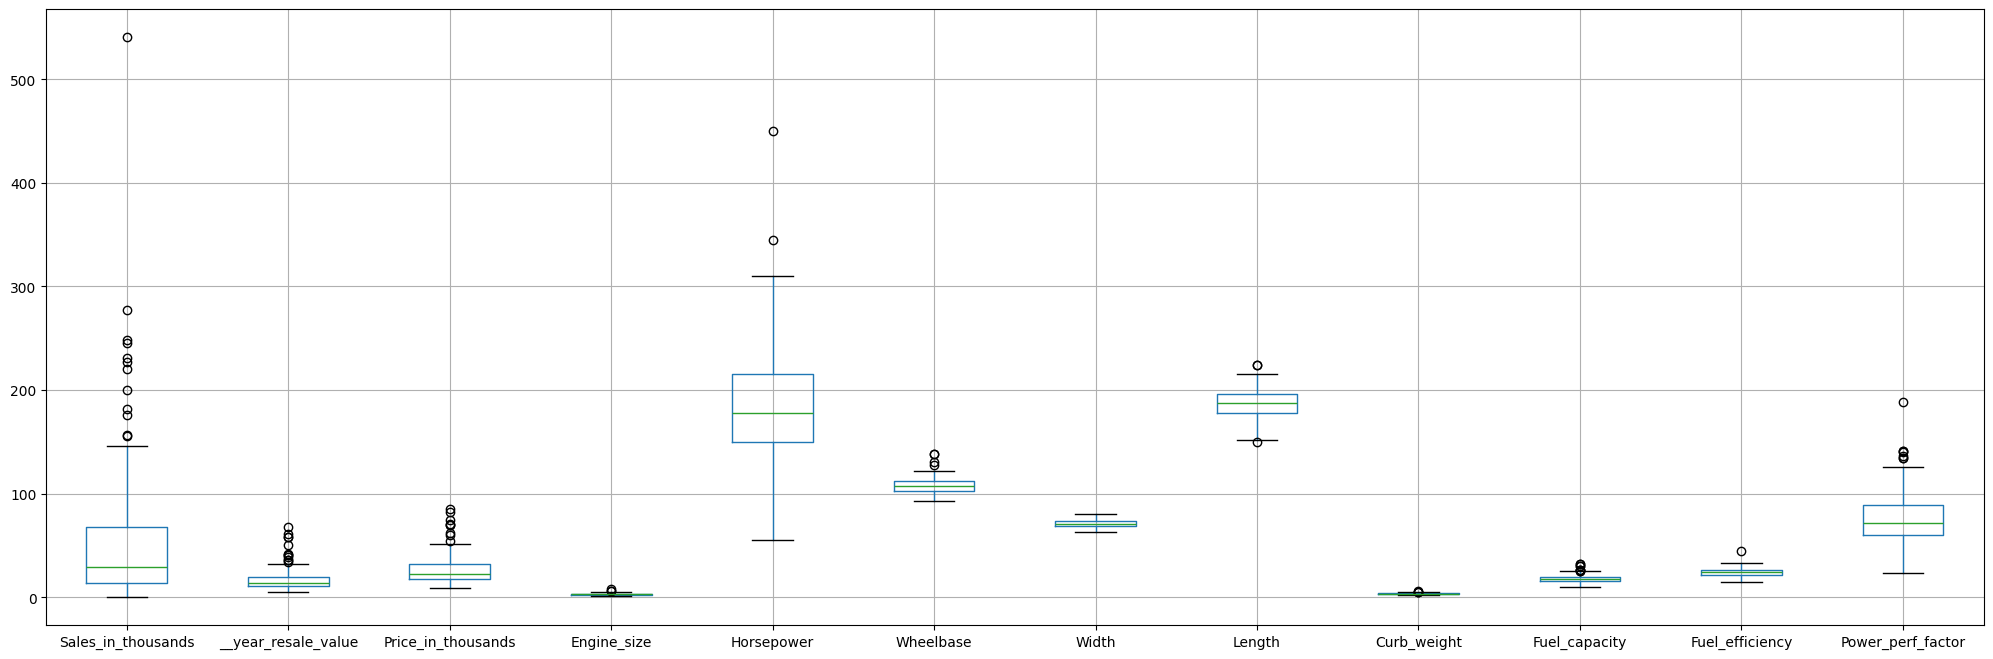

In [6]:
# Визуализация выбросов с помощью boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
df.boxplot()

In [7]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

   - **Шаг 2**: Проведите предварительный анализ данных:
     - Постройте гистограммы для каждого числового признака, чтобы понять их распределение.
     - Постройте диаграммы рассеяния для выявления зависимостей между признаками и целевой переменной (ценой).
     - **Совет**: Используйте корреляционную матрицу для выявления сильных линейных зависимостей между признаками.

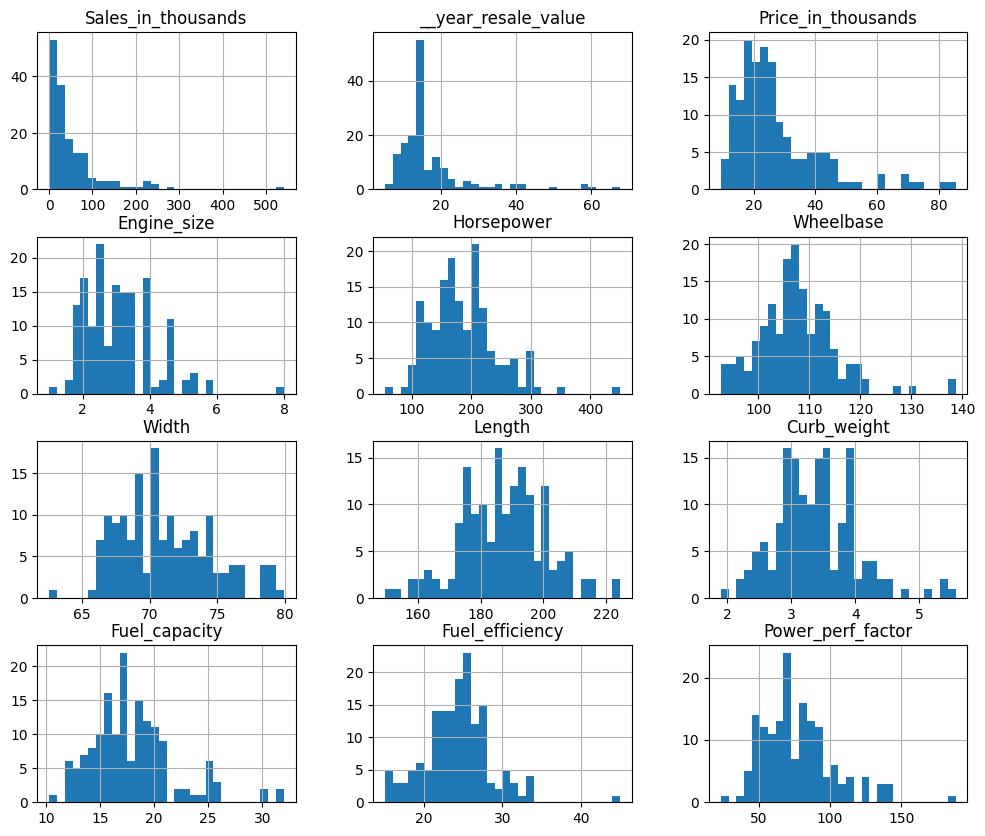

In [8]:
# Гистограммы для каждого числового признака
df[numeric_columns].hist(figsize=(12, 10), bins=30)
plt.show()

<Figure size 1200x1000 with 0 Axes>

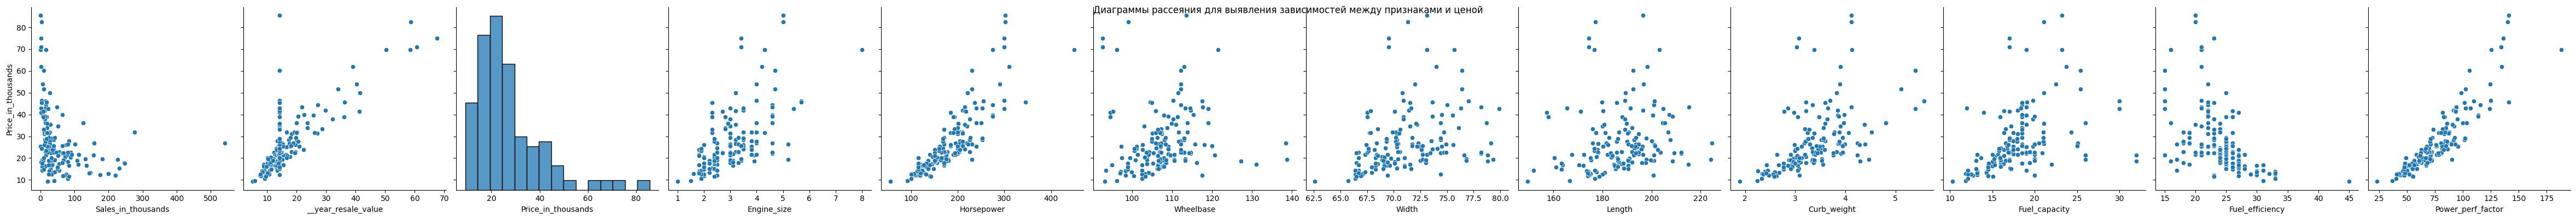

In [9]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, x_vars=numeric_columns, y_vars=['Price_in_thousands'], height=4)
plt.suptitle('Диаграммы рассеяния для выявления зависимостей между признаками и ценой')
plt.show()

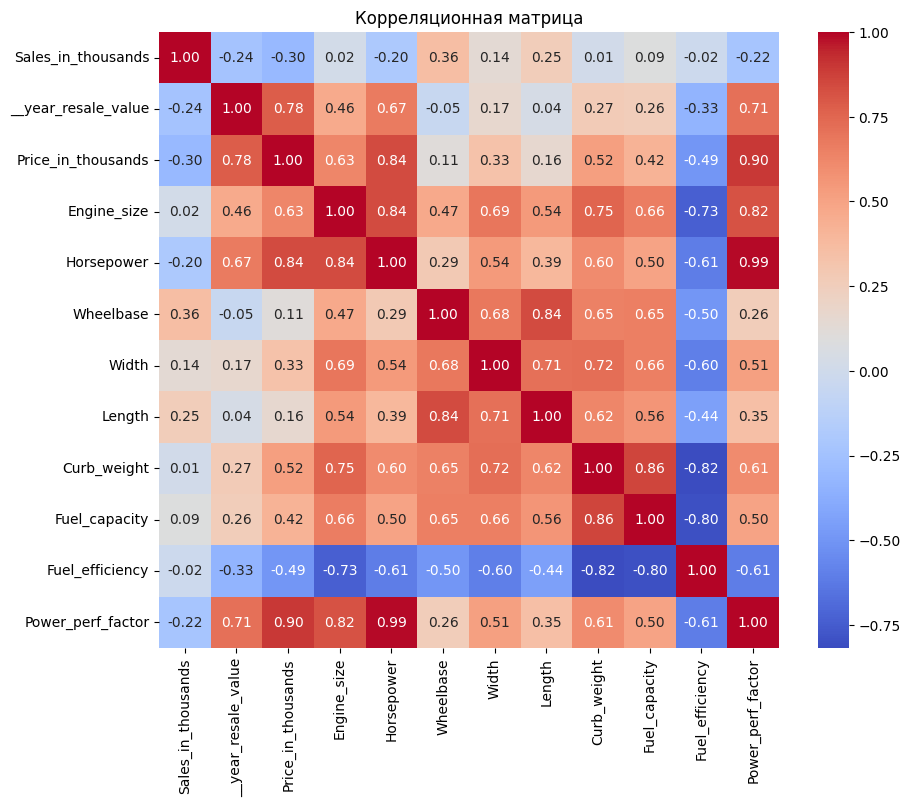

In [10]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки (например, 70% на обучение и 30% на тестирование) с помощью `train_test_split` из `sklearn.model_selection`.

In [11]:
X = df[numeric_columns].drop(columns=['Price_in_thousands'])
y = df['Price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   - **Шаг 4**: Постройте модель линейной регрессии для предсказания цены автомобиля.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LinearRegression`.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

   - **Шаг 5**: Оцените качество модели с использованием метрик MSE и R².
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на то, насколько хорошо ваша модель предсказывает цены.

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Среднеквадратичная ошибка (MSE): 7.047361857273883
Коэффициент детерминации (R^2): 0.9754165163470826


   - **Шаг 6**: Визуализируйте результаты:
     - Постройте график зависимости предсказанных цен от фактических.

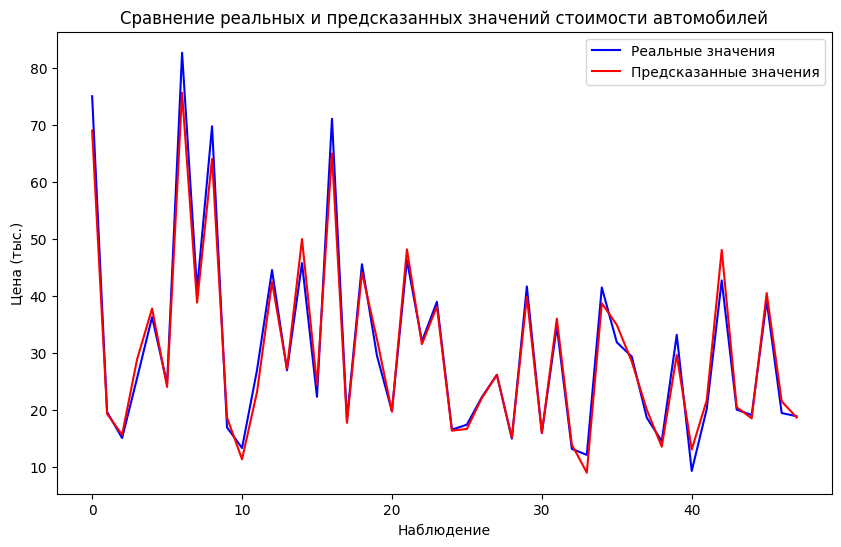

In [14]:
results = pd.DataFrame({
    'Real': y_test.values,
    'Predicted': y_pred
})

results_sorted = results.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(results_sorted['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений стоимости автомобилей')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()


### **Задание №2. Влияние погодных условий на урожайность**:


   - **Шаг 1**: Загрузите набор данных о погодных условиях и урожайности сельскохозяйственных культур.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture

In [17]:
df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv', sep=',')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [18]:
missing_values = df.isnull().sum()
missing_values

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [19]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

   - **Шаг 2**: Выполните анализ данных:
     - Постройте корреляционную матрицу для выявления зависимостей между признаками.
     - Постройте диаграммы рассеяния для ключевых признаков.
     - **Совет**: Удалите или преобразуйте признаки с низкой корреляцией с целевой переменной, чтобы улучшить модель.

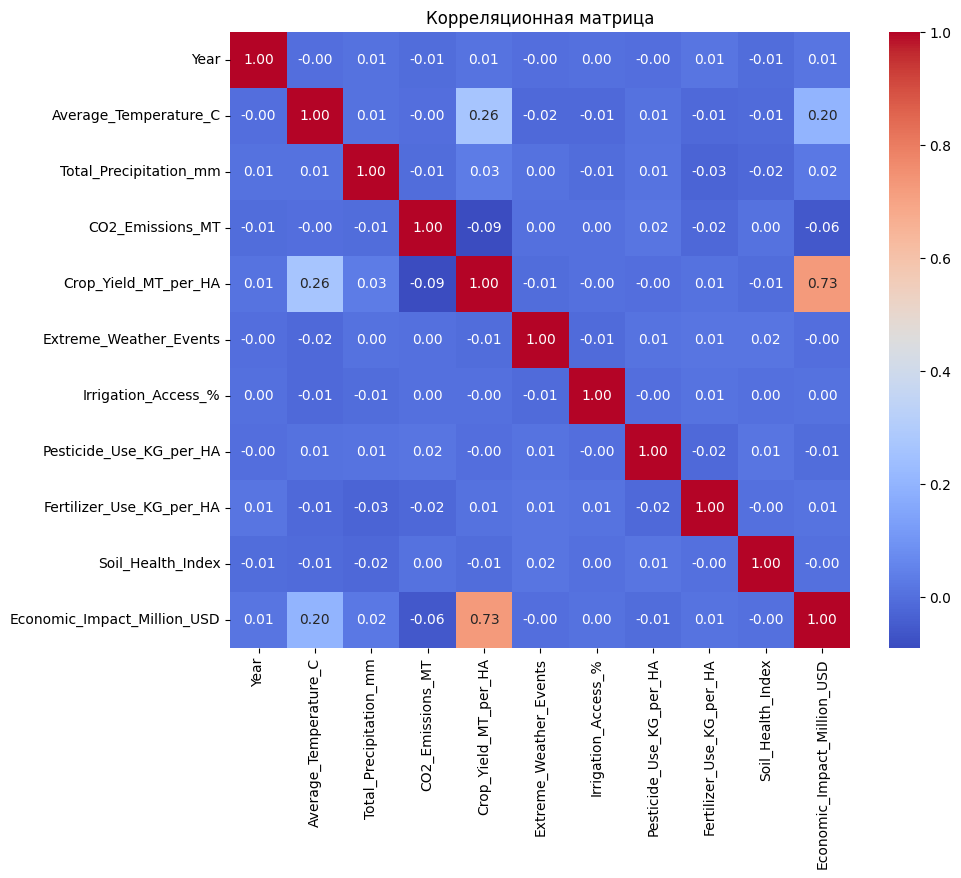

In [20]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

<Figure size 1200x1000 with 0 Axes>

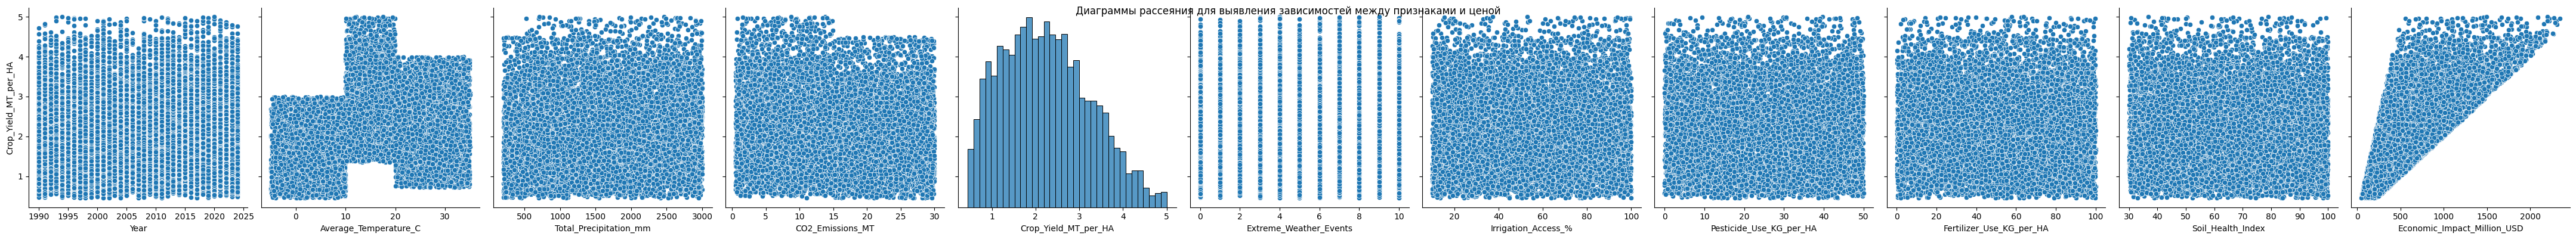

In [21]:
# Диаграммы рассеяния для выявления зависимостей между признаками и целевой переменной (ценой)
plt.figure(figsize=(12, 10))
sns.pairplot(df, x_vars=numeric_columns, y_vars=['Crop_Yield_MT_per_HA'], height=4)
plt.suptitle('Диаграммы рассеяния для выявления зависимостей между признаками и ценой')
plt.show()

In [22]:
# Выбор признаков с высокой корреляцией с целевой переменной (Price_in_thousands)
target_correlation = correlation_matrix['Crop_Yield_MT_per_HA'].sort_values(ascending=False)
target_correlation

Crop_Yield_MT_per_HA           1.000000
Economic_Impact_Million_USD    0.726358
Average_Temperature_C          0.263781
Total_Precipitation_mm         0.029728
Year                           0.010734
Fertilizer_Use_KG_per_HA       0.006423
Irrigation_Access_%           -0.000255
Pesticide_Use_KG_per_HA       -0.004035
Extreme_Weather_Events        -0.005094
Soil_Health_Index             -0.005692
CO2_Emissions_MT              -0.089868
Name: Crop_Yield_MT_per_HA, dtype: float64

In [23]:
threshold = 0.05
selected_features = target_correlation[target_correlation.abs() > threshold].index.tolist()
selected_features.remove('Crop_Yield_MT_per_HA')

In [24]:
df_selected = df[selected_features + ['Crop_Yield_MT_per_HA']]
df_selected.head()

,Economic_Impact_Million_USD,Average_Temperature_C,CO2_Emissions_MT,Crop_Yield_MT_per_HA
0,808.13,1.55,15.22,1.737
1,616.22,3.23,29.82,1.737
2,796.96,21.11,25.75,1.719
3,790.32,27.85,13.91,3.890
4,401.72,2.19,11.81,1.080


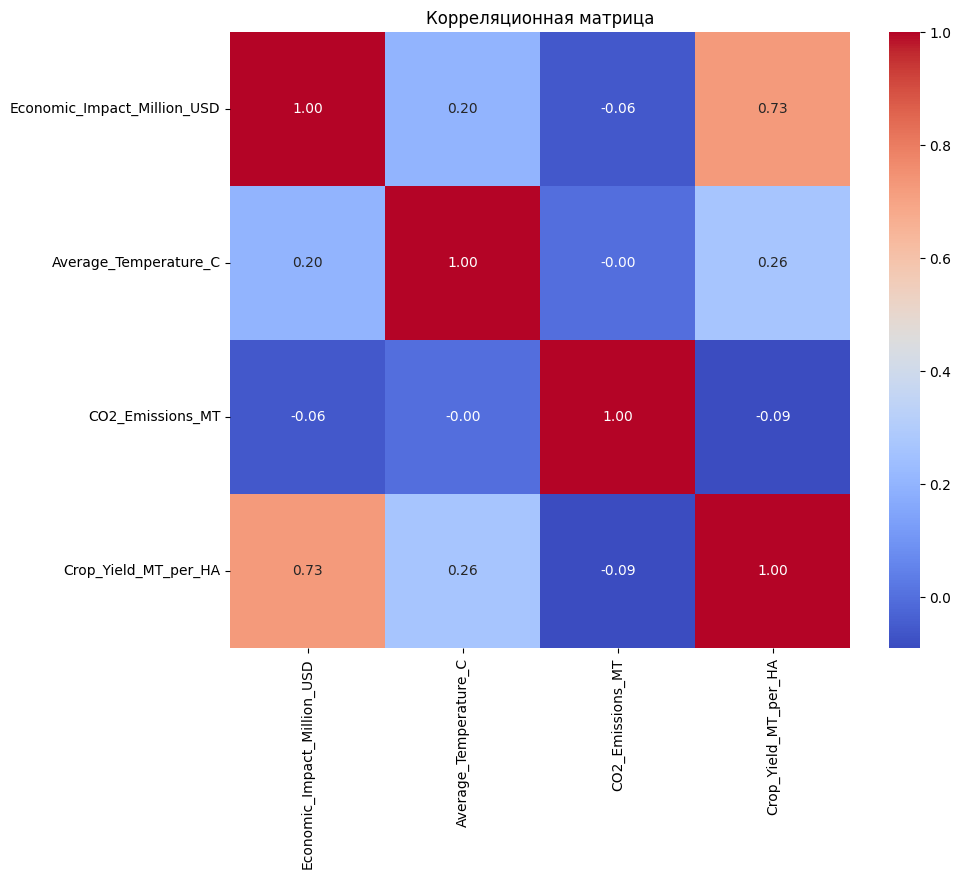

In [25]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [26]:
X = df_selected[selected_features]
y = df_selected['Crop_Yield_MT_per_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   - **Шаг 4**: Постройте модель линейной регрессии для оценки влияния температуры и уровня осадков на урожайность.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели.

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

   - **Шаг 5**: Проведите оценку точности модели.
     - Выведите значения метрик MSE и R² и интерпретируйте их.

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R²): {r2}")

Среднеквадратичная ошибка (MSE): 0.45817217187054654
Коэффициент детерминации (R²): 0.5659077576069629


   - **Шаг 6**: Визуализируйте данные и результаты модели:
     - Постройте график зависимости предсказанных значений от фактических.

In [29]:
results_2 = pd.DataFrame({
    'Real': y_test.values,
    'Predicted': y_pred
})

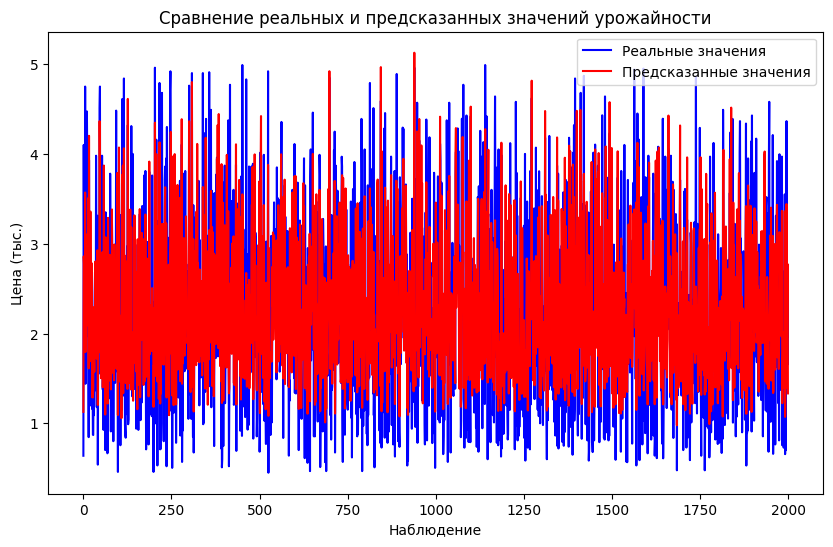

In [30]:
results_sorted_2 = results_2.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(results_sorted_2['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_2['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений урожайности')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()

## **Логистическая регрессия**


### **Задание №3. Классификация клиентов банка**:


   - **Шаг 1**: Загрузите набор данных о клиентах банка, включающий данные о возрасте, доходе, кредитной истории и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

In [32]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

   - **Шаг 2**: Проведите анализ данных и предобработку:
     - Закодируйте категориальные переменные с помощью `OneHotEncoder` или `pd.get_dummies`.
     - Нормализуйте числовые признаки с помощью `StandardScaler` для улучшения обучения модели.
     - **Совет**: Убедитесь, что все признаки имеют одинаковый масштаб, чтобы избежать доминирования одного признака над другими.

In [35]:
X = df.drop(columns=['y'])
y = df['y']


numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Кодирование категориальных переменных
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Нормализация числовых признаков
scaler = StandardScaler()
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

   - **Шаг 4**: Постройте модель логистической регрессии для предсказания вероятности открытия депозитного счета клиентом.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.

In [37]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

   - **Шаг 5**: Оцените качество модели с использованием метрик точности, полноты и F1-меры.
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на баланс между точностью и полнотой.
    - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.

Точность модели: 0.9111
Точность (Precision): 0.6689
Полнота (Recall): 0.4299
F1-мера: 0.5234

Отчет о классификации:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



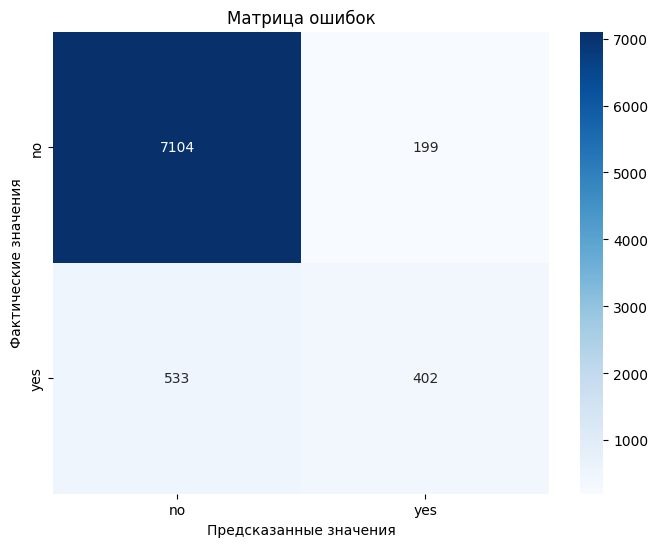

In [38]:
# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

print(f"Точность модели: {accuracy:.4f}")
print(f"Точность (Precision): {precision:.4f}")
print(f"Полнота (Recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")

# Вывод отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred, labels=['no', 'yes'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок')
plt.show()



   

   
   

   

   
   - **Шаг 6**: Визуализируйте ROC-кривую и вычислите AUC для оценки модели.
     - Используйте `roc_curve` и `auc` из `sklearn.metrics` для построения и расчета.

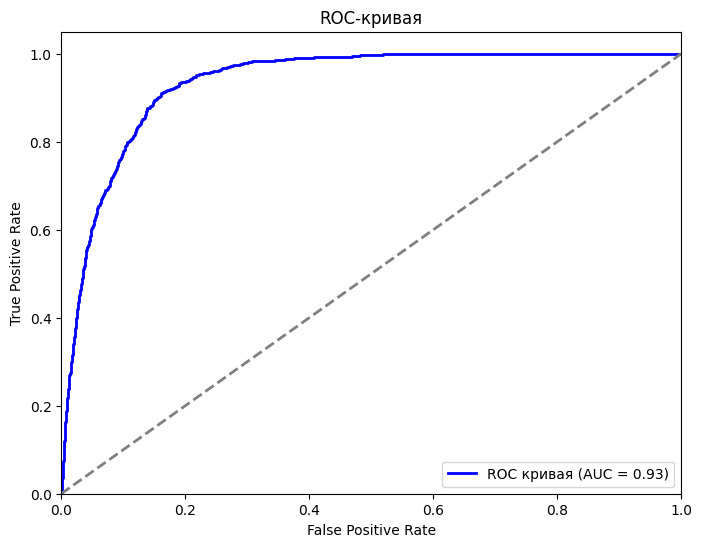

In [39]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### **Задание №4. Распознавание спама**:


   - **Шаг 1**: Загрузите набор данных с текстами электронных писем, маркированных как "спам" или "не спам".
     - **Совет**: Проверьте данные на наличие пропущенных значений и оцените, какие признаки могут быть важными для классификации.

- Ссылка на набор данных: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [5]:
df = pd.read_csv('spam.csv', sep=',', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

# df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

df.head()

Пропущенные значения:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
class_distribution = df['v1'].value_counts()
class_distribution

v1
ham     4825
spam     747
Name: count, dtype: int64

   - **Шаг 2**: Выполните предварительную обработку текстов:
     - Выполните токенизацию и векторизацию с помощью `Word2Vec` или `Doc2Vec`.

In [44]:
!pip install gensim

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 9.0 MB/s eta 0:00:0000:0100:01m
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 8.5 MB/s eta 0:00:0000:0100:01
Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (89 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy╺━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
    Found existing installation: scipy 1.15.3━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
    Uninstalling scipy-1.15.3:━━╺━━━━━━━━━━━━━━━ 

In [8]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Токенизация документов
documents = [TaggedDocument(words=row.split(), tags=[i]) for i, row in enumerate(df['v2'])]
# Обучение модели Doc2Vec
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, epochs=100)
# Получение векторов документов
X = [model.infer_vector(doc.words) for doc in documents]
y = df['v1']

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

   - **Шаг 4**: Постройте модель логистической регрессии для классификации писем на спам и не спам.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.
     - Сравните результаты с моделью `MultinomialNB` *(Наивного Байеса)*

In [11]:
from sklearn.utils import class_weight

# Балансировка классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

logreg_model = LogisticRegression(random_state=42, class_weight=class_weights_dict, C=1.0, solver='liblinear')
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Точность модели логистической регрессии: {accuracy_logreg:.4f}")
print("Отчет о классификации для логистической регрессии:")
print(classification_report(y_test, y_pred_logreg))

Точность модели логистической регрессии: 0.9246
Отчет о классификации для логистической регрессии:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1454
           1       0.65      0.91      0.76       218

    accuracy                           0.92      1672
   macro avg       0.82      0.92      0.86      1672
weighted avg       0.94      0.92      0.93      1672



In [12]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

X_train_abs = np.abs(X_train)
X_test_abs = np.abs(X_test)

mnb_model = MultinomialNB()
mnb_model.fit(X_train_abs, y_train)

# Предсказание на тестовой выборке
y_pred_mnb = mnb_model.predict(X_test_abs)
y_prob_mnb = mnb_model.predict_proba(X_test_abs)[:, 1]

# Оценка модели MultinomialNB
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Точность модели MultinomialNB: {accuracy_mnb:.4f}")
print("Отчет о классификации для MultinomialNB:")
print(classification_report(y_test, y_pred_mnb))

Точность модели MultinomialNB: 0.8762
Отчет о классификации для MultinomialNB:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1454
           1       1.00      0.05      0.10       218

    accuracy                           0.88      1672
   macro avg       0.94      0.53      0.51      1672
weighted avg       0.89      0.88      0.82      1672



   - **Шаг 5**: Оцените качество моделей с помощью матрицы ошибок и ROC-кривой.
     - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.
     - Постройте ROC-кривую и вычислите AUC.

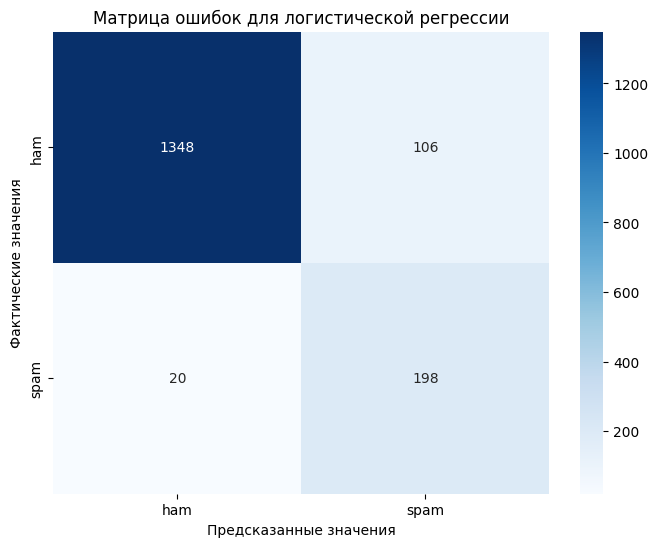

In [13]:
# Матрица ошибок для логистической регрессии
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Визуализация матрицы ошибок для логистической регрессии
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок для логистической регрессии')
plt.show()

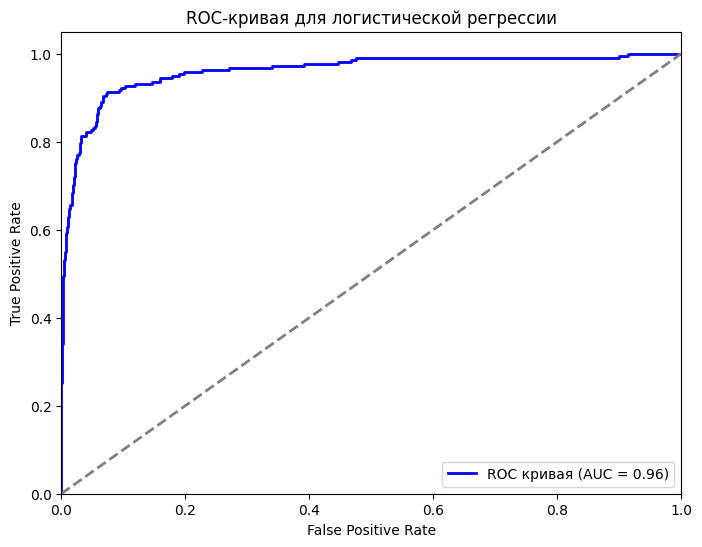

In [17]:
# ROC-кривая и AUC для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'ROC кривая (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

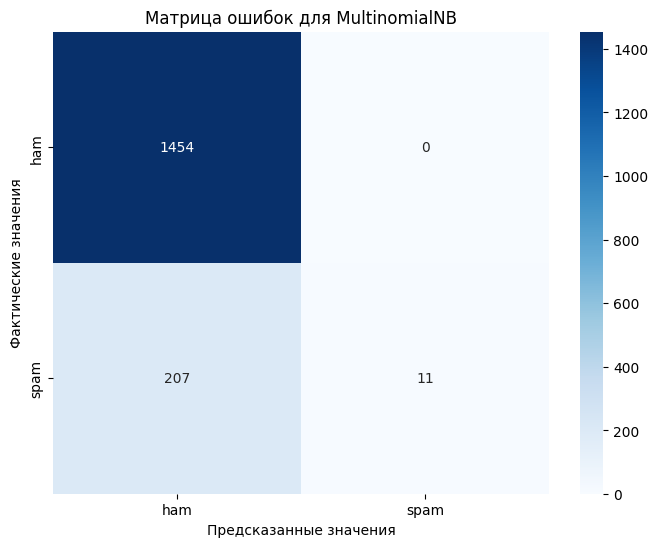

In [18]:
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок для MultinomialNB')
plt.show()

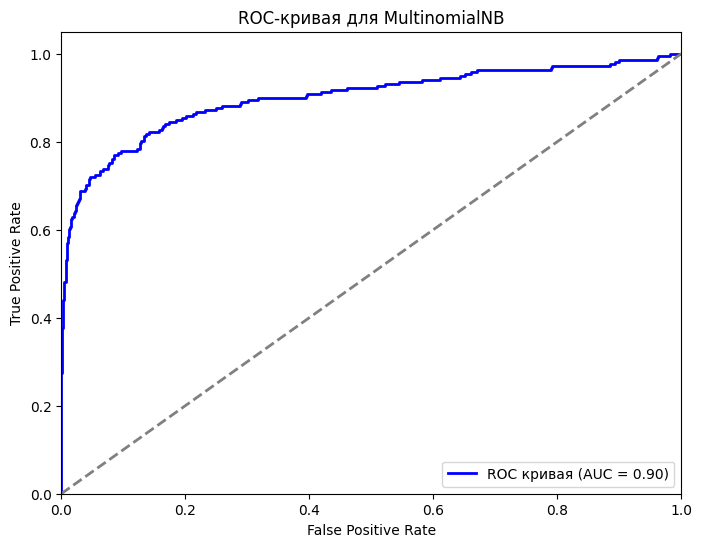

In [19]:
# ROC-кривая и AUC для MultinomialNB
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, color='blue', lw=2, label=f'ROC кривая (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для MultinomialNB')
plt.legend(loc="lower right")
plt.show()

   - **Шаг 6**: Визуализируйте результаты классификации и сравните их с исходными метками.
     - Приведите примеры писем, которые были неправильно классифицированы, и напишите возможные причины ошибок.

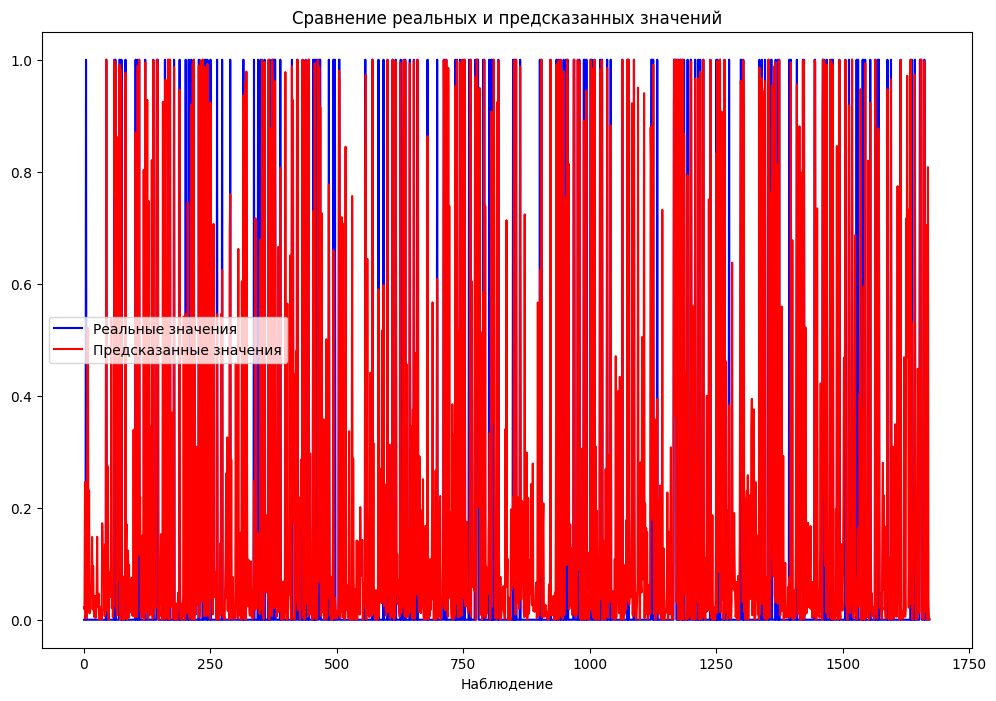

In [20]:
results_logreg = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_prob_logreg
})

# Сортировка значений для визуализации
results_sorted_log = results_logreg.sort_index()

# Построение графика
plt.figure(figsize=(12, 8))
plt.plot(results_sorted_log['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_log['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Наблюдение')
plt.show()

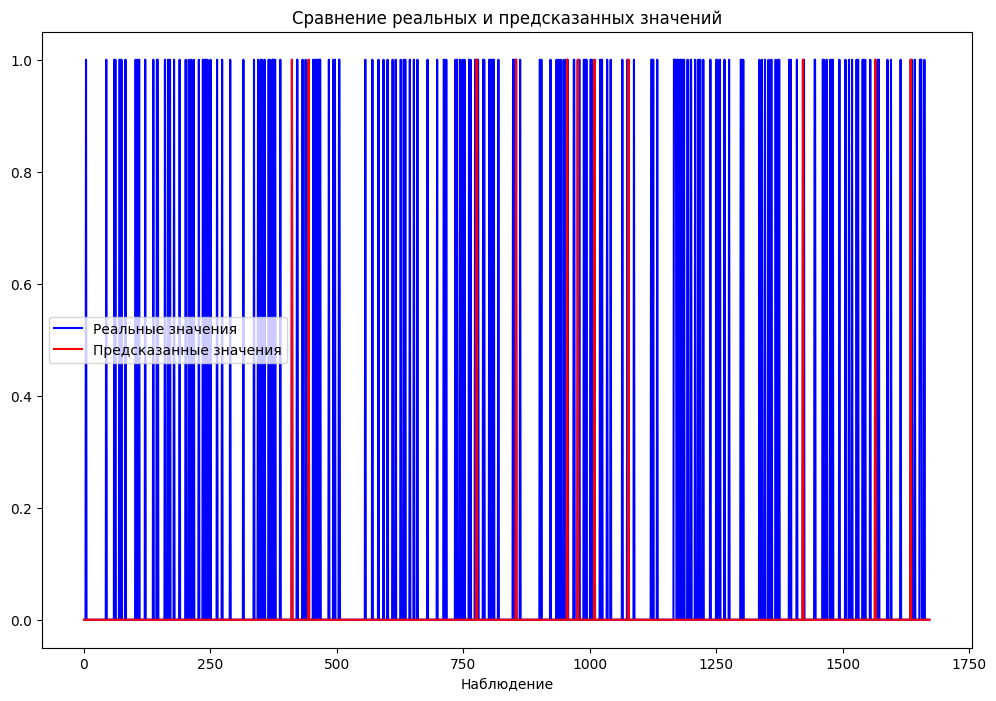

In [21]:
results_nb = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_pred_mnb
})

results_sorted_nb = results_nb.sort_index()

plt.figure(figsize=(12, 8))
plt.plot(results_sorted_nb['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_nb['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Наблюдение')
plt.show()

In [23]:
# Примеры неправильно классифицированных писем
misclassified_indices = np.where(y_test != y_pred_logreg)[0]
for idx in misclassified_indices[:5]:
    print(f"Actual: {df.iloc[idx]['v1']}, Predicted: {label_encoder.inverse_transform([y_pred_logreg[idx]])[0]}")
    print(f"Text: {df.iloc[idx]['v2']}\n")

Actual: ham, Predicted: ham
Text: Nah I don't think he goes to usf, he lives around here though

Actual: ham, Predicted: spam
Text: As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

Actual: spam, Predicted: spam
Text: SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV

Actual: ham, Predicted: spam
Text: Ha ha ha good joke. Girls are situation seekers.

Actual: ham, Predicted: spam
Text: Sorry my roommates took forever, it ok if I come by now?

